In [2]:
import os
import tarfile 
import urllib
import pandas as pd, numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# this helps with the width of the cells - i like when they are at 100 per - give more space to write code !!!
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
# os.listdir('datasets/housing/')
# os.makedirs(housing_path)
os.listdir('datasets/housing/')

['housing.csv', 'images', '.ipynb_checkpoints', 'housing.tgz']

In [5]:
DOWNLOAD_ROOT='https://raw.githubusercontent.com/ageron/handson-ml2/master/'
HOUSING_PATH = os.path.join('datasets','housing')
HOUSING_URL  = DOWNLOAD_ROOT+'datasets/housing/housing.tgz'

In [6]:
def fectch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path,exist_ok=True)
    tgz_path = os.path.join(housing_path,'housing.tgz')
    urllib.request.urlretrieve(housing_url,tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [7]:
fectch_housing_data()

In [8]:
# help(urllib.request.urlretrieve)

In [9]:
def load_housing_data(housing_path = HOUSING_PATH):
    csv_path= os.path.join(housing_path,'housing.csv')
    return pd.read_csv(csv_path)

In [10]:
housing= load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [11]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [12]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


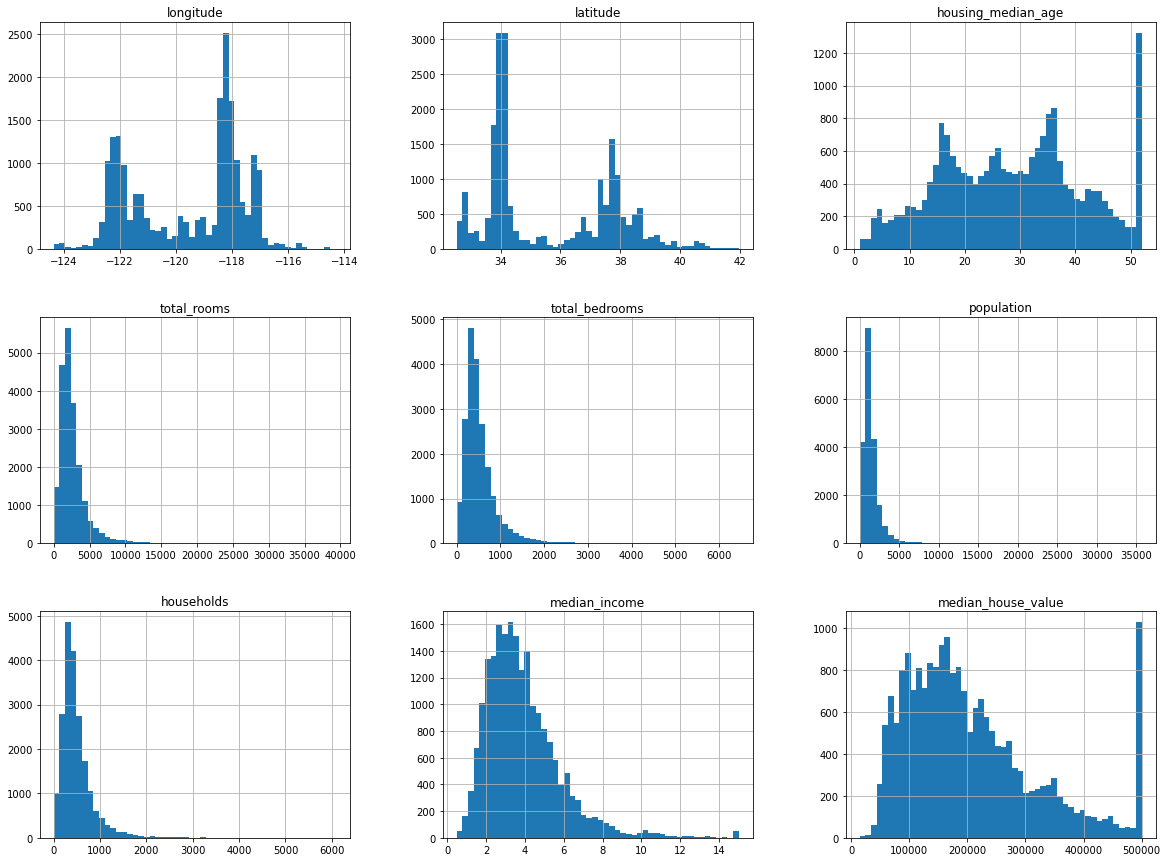

In [13]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [14]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

In [15]:
housing['income_cat']= pd.qcut(housing['housing_median_age'],
                              q=[0,.2,.4,.6,.8,1],
                              labels=[1,2,3,4,5])

In [16]:
split=StratifiedShuffleSplit(n_splits=1,random_state=40,test_size=.2)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [17]:
for x in (strat_train_set, strat_test_set):
    x.drop('income_cat', axis=1, inplace=True)

In [18]:
housing = strat_train_set.copy()
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [19]:
# Download the California image
images_path = os.path.join(HOUSING_PATH, "images", "end_to_end_project")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('datasets/housing/images/end_to_end_project/california.png',
 <http.client.HTTPMessage at 0x7faa21ab6d30>)

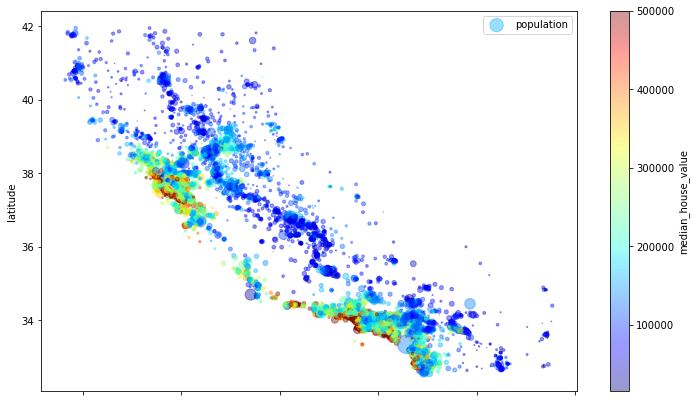

In [20]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=.4,
            s=housing['population']/100, label='population',figsize=(12,7),
            c='median_house_value',cmap=plt.get_cmap('jet'),colorbar='True')
plt.legend()

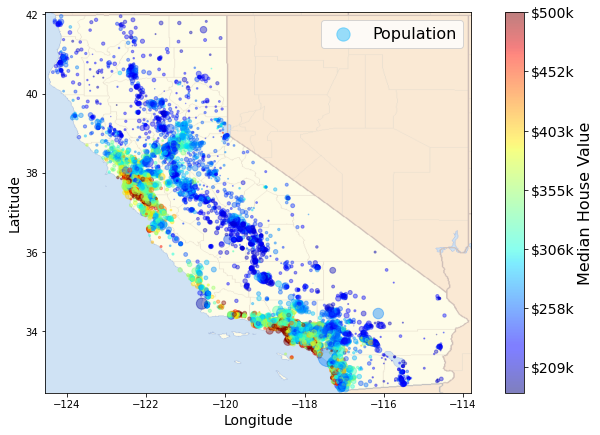

In [21]:
import matplotlib.image as mpimg
from matplotlib.pyplot import savefig
california_img=mpimg.imread(os.path.join(images_path, filename))
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(12,7),
                       s=housing['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
savefig("california_housing_prices_plot")
plt.show()

In [22]:
corr_matrix=housing.corr()
# corr_matrix
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688980
total_rooms           0.139516
housing_median_age    0.103397
households            0.072382
total_bedrooms        0.055052
population           -0.018043
longitude            -0.048165
latitude             -0.142881
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

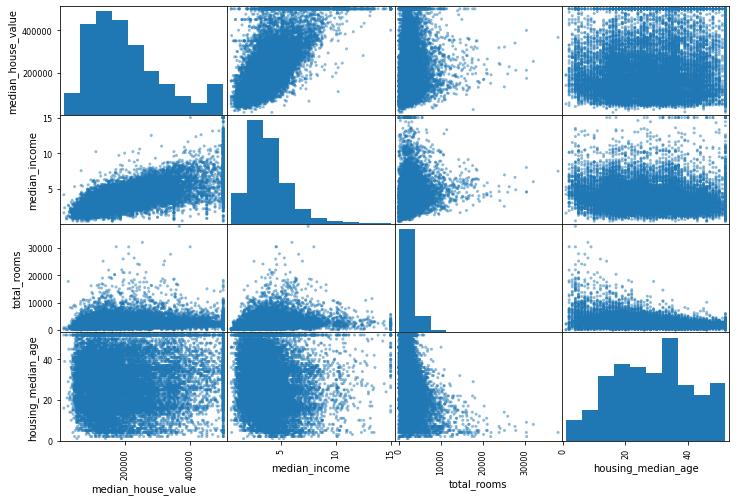

In [23]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
                  "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

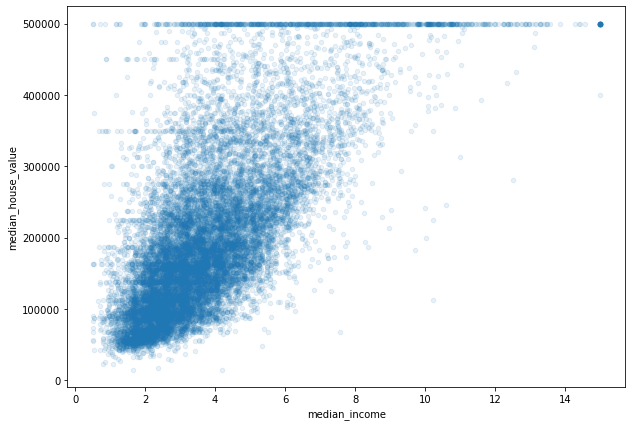

In [24]:
housing.plot(kind='scatter', x='median_income', y ='median_house_value', alpha=.1, figsize =(10,7))

## Preparing data for Machine learning algorithms

In [25]:
# seperating the data and the label- dependent and independent
    
# housing.columns
housing = strat_train_set.drop('median_house_value', axis=1)
housing_label = strat_train_set['median_house_value'].copy()

In [26]:
# cool new way of selecting the subset basis dtypes

housing_num=housing.select_dtypes(include=[np.number])
housing_cat= housing.select_dtypes(exclude=[np.number])

In [27]:
# housing.info()
# housing_num.head()
# housing_cat.head()

### Missing values - Numerical

In [28]:
# imputation of the missing value in the numercial columns using the median.
from sklearn.impute import SimpleImputer
imputer= SimpleImputer(strategy='median')
imputer.fit(housing_num)

print(imputer.statistics_)
print(housing_num.median().values)
X=imputer.transform(housing_num)
housing_tr=pd.DataFrame(X, columns=housing_num.columns, index = housing.index)

[-118.49     34.26     29.     2118.      433.     1161.      408.
    3.5346]
[-118.49     34.26     29.     2118.      433.     1161.      408.
    3.5346]


In [29]:
# housing_tr.head()

### Handling Text and Categorical Attributes
If a categorical attribute has a large number of possible categories (e.g., country code, profession, species, etc.), then one-hot encod‐ ing will result in a large number of input features. This may slow down training and degrade performance. If this happens, you may want to replace the categorical input with useful numerical features related to the categories: for example, you could replace the ocean_proximity feature with the distance to the ocean (similarly, a country code could be replaced with the country’s population and GDP per capita). Alternatively, you could replace each category with a learnable low dimensional vector called an embedding. Each category’s representation would be learned during training: this is an example of representation learning 

In [30]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot=cat_encoder.fit_transform(housing_cat)
cat_encoder.fit(housing_cat)
print(cat_encoder.categories_)
housing_cat_1hot

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

### Custom Transformers
Scikit-Learn relies on duck typing (not inher‐ itance), all you need is to create a class and implement three methods:
- fit() (returning self),
- transform(), and
- fit_transform().

You can get the last one for free by simply adding TransformerMixin as a base class. Also, if you add BaseEstima tor as a base class (and avoid *args and **kargs in your constructor) you will get two extra methods (get_params() and set_params()) that will be useful

In [31]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4446,-118.21,34.07,31.0,1077.0,300.0,1198.0,274.0,2.1333,<1H OCEAN
5648,-118.29,33.74,52.0,1438.0,472.0,1018.0,399.0,2.2188,NEAR OCEAN
17495,-119.80,34.44,27.0,2674.0,419.0,1176.0,416.0,5.0294,NEAR OCEAN
11128,-117.93,33.85,27.0,1962.0,544.0,1492.0,481.0,1.9621,<1H OCEAN
15633,-122.41,37.80,52.0,1724.0,416.0,1016.0,395.0,3.3839,NEAR BAY


In [32]:
from sklearn.base import BaseEstimator,TransformerMixin
col_names ='total_rooms','total_bedrooms', 'population', 'households'
room_ix, bedroom_ix,population_ix, household_ix =[housing.columns.get_loc(c) for c in col_names]

class CombinedAttributeAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedroom_per_room = True):
        self.add_bedroom_per_room= add_bedroom_per_room
    def fit(self, X, y=None):
        return self
    def transform (self, X):
        rooms_per_household =X[:,room_ix]/X[:,household_ix]
        population_per_houshold = X[:,population_ix]/X[:,household_ix]
        if self.add_bedroom_per_room:
            bedroom_per_household= X[:,bedroom_ix]/X[:,room_ix]
            return np.c_[X, rooms_per_household,population_per_houshold,bedroom_per_household]
        else :
            return np.c_[X, rooms_per_household,population_per_houshold]

In [35]:
attr_adder= CombinedAttributeAdder(add_bedroom_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)
print(housing_extra_attribs.shape)
print(housing.shape)
housing_extra_attribs= pd.DataFrame(housing_extra_attribs,
                                   columns=list(housing.columns)+['rooms_per_household','population_per_household'],
                                   index = housing.index)
print(housing_extra_attribs.columns)
housing_extra_attribs.head()

(16512, 11)
(16512, 9)
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'rooms_per_household', 'population_per_household'],
      dtype='object')


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
4446,-118.21,34.07,31.0,1077.0,300.0,1198.0,274.0,2.1333,<1H OCEAN,3.930657,4.372263
5648,-118.29,33.74,52.0,1438.0,472.0,1018.0,399.0,2.2188,NEAR OCEAN,3.60401,2.551378
17495,-119.8,34.44,27.0,2674.0,419.0,1176.0,416.0,5.0294,NEAR OCEAN,6.427885,2.826923
11128,-117.93,33.85,27.0,1962.0,544.0,1492.0,481.0,1.9621,<1H OCEAN,4.079002,3.101871
15633,-122.41,37.8,52.0,1724.0,416.0,1016.0,395.0,3.3839,NEAR BAY,4.364557,2.572152


### Feature Scaling

- With few exceptions, Machine Learning algorithms don’t perform well when the input numerical attributes have very different scales.
- Note that scaling the target values is generally not required.
- There are two common ways to get all attributes to have the same scale: min-max scaling and standardization.

**Min-max scaling** (many people call this normalization) is quite simple: values are shifted and rescaled so that they end up ranging from 0 to 1. We do this by subtract‐ ing the min value and dividing by the max minus the min. Scikit-Learn provides a transformer called MinMaxScaler for this. It has a feature_range hyperparameter that lets you change the range if you don’t want 0–1 for some reason.

**Standardization** is quite different: first it subtracts the mean value (so standardized values always have a zero mean), and then it divides by the standard deviation so that the resulting distribution has unit variance. 

Unlike min-max scaling, standardization does not bound values to a specific range, which may be a problem for some algo‐ rithms (e.g., neural networks often expect an input value ranging from 0 to 1). How‐ ever, standardization is much less affected by outliers. For example, suppose a district had a median income equal to 100 (by mistake). Min-max scaling would then crush all the other values from 0–15 down to 0–0.15, whereas standardization would not be much affected. Scikit-Learn provides a transformer called StandardScaler for stand‐ ardization.

**As with all the transformations, it is important to fit the scalers to the training data only, not to the full dataset (including the test set). Only then can you use them to transform the training set and the test set (and new data).**

### Transformation Pipelines

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribute_adder', CombinedAttributeAdder()),
    ('std_scaler', StandardScaler())
    ])

In [37]:
from sklearn.compose import ColumnTransformer
num_attributes = list(housing_num)
cat_attributes = list(housing_cat)
full_pipeline= ColumnTransformer([
    ('num', num_pipeline, num_attributes),
    ('cat', OneHotEncoder(), cat_attributes),])
housing_prepared= full_pipeline.fit_transform(housing)

In [38]:
# since the data set is ready and fully transforned for machine laerning we can now apply models
from sklearn.linear_model import LinearRegression
lin_reg= LinearRegression()
lin_reg.fit(housing_prepared, housing_label)

from sklearn.metrics import mean_squared_error
housing_predictions= lin_reg.predict(housing_prepared)
lin_mse= mean_squared_error(housing_label, housing_predictions)
lin_mse= np.sqrt(lin_mse)
lin_mse

68247.81837364913

In [39]:
# decision tree with the error of including the entire dataset for training
from sklearn.tree import DecisionTreeRegressor
tree_reg= DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_label)

housing_predictions= tree_reg.predict(housing_prepared)
tree_mse=mean_squared_error(housing_label, housing_predictions)
tree_mse= np.sqrt(tree_mse)
tree_mse

0.0

In [40]:
# Better evaluation with cross validation - k fold cross validation feature
from sklearn.model_selection import cross_val_score
score= cross_val_score(tree_reg, housing_prepared, housing_label, scoring= 'neg_mean_squared_error', cv=10)
tree_rmse_score = np.sqrt(-score)


def display_score(scores):
    print('scores:', scores)
    print('Mean:', scores.mean())
    print('std dev:', scores.std())
display_score(tree_rmse_score)

scores: [72738.60138051 67015.1274295  73608.29663273 71810.7720985
 70739.95813524 71054.86060557 69807.55022118 75671.2635715
 69750.69776833 73875.03554958]
Mean: 71607.2163392631
std dev: 2362.525064865143


In [41]:
# Liner regression with cross validation
lin_score = cross_val_score(lin_reg, housing_prepared, housing_label, scoring='neg_mean_squared_error', cv=10)
lin_rms_score= np.sqrt(-lin_score)
display_score(lin_rms_score)

scores: [64693.28303223 68874.36656229 68858.83111025 71238.42808953
 65515.13219267 69262.06046224 64200.56975124 71129.61650641
 68922.95063607 73306.2406881 ]
Mean: 68600.14790310428
std dev: 2834.2139781677574


In [42]:
# Random forest regressor with cross validation
from sklearn.ensemble import RandomForestRegressor
forest_reg= RandomForestRegressor()
# forest_reg.fit(housing_prepared, housing_label)


forest_score = cross_val_score(forest_reg, housing_prepared, housing_label, scoring='neg_mean_squared_error', cv=10)
forest_score_rmse= np.sqrt(-forest_score)
display_score(forest_score_rmse)

scores: [50886.72588998 51168.90272803 51472.69249756 52765.54938682
 47320.50298651 48683.07917193 47692.18247892 52204.33361466
 49094.45676437 51449.78138349]
Mean: 50273.82069022793
std dev: 1823.2085182563776


In [43]:
# conda update --all

In [44]:
# saving the model
import sklearn.externals
import joblib

joblib.dump(forest_reg,'forest.pkl')

# and later it can be retrived as 
forest_model= joblib.load('forest.pkl')

# validation that the stored model is working as below

forest_score = cross_val_score(forest_model, housing_prepared, housing_label, scoring='neg_mean_squared_error', cv=10)
forest_score_rmse= np.sqrt(-forest_score)
display_score(forest_score_rmse)

scores: [50773.5266434  50887.8149506  51724.26838911 52632.55682444
 47482.61212319 48587.39605028 48024.46422504 52355.5045311
 49273.79084327 51770.99325   ]
Mean: 50351.292783044984
std dev: 1774.9248220149225


In [45]:
# fine tuning of the models with Grid search 
from sklearn.model_selection import GridSearchCV

param_grid = [
        {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
        {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]


forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                               scoring='neg_mean_squared_error',
                               return_train_score=True)

grid_search.fit(housing_prepared, housing_label)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [46]:
cvres= grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

64233.02758751532 {'max_features': 2, 'n_estimators': 3}
55811.27091868835 {'max_features': 2, 'n_estimators': 10}
52646.006354712605 {'max_features': 2, 'n_estimators': 30}
60087.642938461046 {'max_features': 4, 'n_estimators': 3}
52575.74190091795 {'max_features': 4, 'n_estimators': 10}
50570.98549711954 {'max_features': 4, 'n_estimators': 30}
59096.20360034109 {'max_features': 6, 'n_estimators': 3}
51896.88377880266 {'max_features': 6, 'n_estimators': 10}
50426.02903572838 {'max_features': 6, 'n_estimators': 30}
59080.18209475187 {'max_features': 8, 'n_estimators': 3}
52174.503866188345 {'max_features': 8, 'n_estimators': 10}
50311.87287274347 {'max_features': 8, 'n_estimators': 30}
62536.73250529279 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54120.16546383905 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59810.7100350658 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52655.9404636272 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

In [47]:
feature_importance= grid_search.best_estimator_.feature_importances_
feature_importance

array([6.58634933e-02, 6.08586198e-02, 4.16493207e-02, 1.50493231e-02,
       1.57545770e-02, 1.48471133e-02, 1.38412858e-02, 3.82454792e-01,
       4.26615399e-02, 1.12398234e-01, 4.71989316e-02, 3.37454366e-03,
       1.78639035e-01, 1.84112782e-04, 2.02489320e-03, 3.20018509e-03])

In [48]:
extra_attribs=['rooms_per_household', 'pop_per_hhold','bedrooms_per_room']
cat_encoder=full_pipeline.named_transformers_['cat']
cat_one_hot_attrbs=list(cat_encoder.categories_[0])
attributes=num_attributes+extra_attribs+cat_one_hot_attrbs
sorted(zip(feature_importance, attributes),reverse=True)

[(0.382454792003493, 'median_income'),
 (0.1786390347298784, 'INLAND'),
 (0.11239823409100934, 'pop_per_hhold'),
 (0.06586349334453247, 'longitude'),
 (0.06085861983132567, 'latitude'),
 (0.04719893155950203, 'bedrooms_per_room'),
 (0.042661539879802715, 'rooms_per_household'),
 (0.04164932069714424, 'housing_median_age'),
 (0.0157545769520374, 'total_bedrooms'),
 (0.01504932306391616, 'total_rooms'),
 (0.014847113266868344, 'population'),
 (0.01384128584396714, 'households'),
 (0.0033745436632141965, '<1H OCEAN'),
 (0.003200185087085687, 'NEAR OCEAN'),
 (0.002024893203975398, 'NEAR BAY'),
 (0.00018411278224783915, 'ISLAND')]

In [49]:
# evaluate your system on the test set
final_model = grid_search.best_estimator_

x_test = strat_test_set.drop('median_house_value',axis=1)
y_test= strat_test_set['median_house_value'].copy()

In [50]:
X_test_prepared= full_pipeline.transform(x_test)
final_predictions=final_model.predict(X_test_prepared)
final_mse= mean_squared_error(y_test, final_predictions)
final_mse= np.sqrt(final_mse)
final_mse

48782.820799557834

In [51]:
from scipy import stats
confidence =0.95
squared_errors= (final_predictions-y_test)**2
np.sqrt(stats.t.interval(confidence, len(squared_errors)-1,
                        loc=squared_errors.mean(),
                        scale= stats.sem(squared_errors)))


array([46594.81853825, 50876.81294766])

In [52]:
# SVM with cross validation
from sklearn import svm
svm_reg=svm.SVR()
svm_reg.fit(housing_prepared, housing_label)


svm_reg_score = cross_val_score(svm_reg, housing_prepared, housing_label, scoring='neg_mean_squared_error', cv=10)
svm_score_rmse= np.sqrt(-svm_reg_score)
display_score(svm_score_rmse)

scores: [113557.8845367  115021.34050237 117219.07946969 118960.24098735
 124102.4844101  123525.81102019 115227.66433041 121888.65194645
 115248.92889602 117473.71777033]
Mean: 118222.58038695964
std dev: 3578.6730665185437


In [57]:
from sklearn.model_selection import GridSearchCV

param_grid = [
        {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
        {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]

svm_reg = svm.SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(housing_prepared, housing_label)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END ..............................C=10.0, kernel=linear; total time=   9.4s
[CV] END ..............................C=10.0, kernel=linear; total time=   9.3s
[CV] END ..............................C=10.0, kernel=linear; total time=   9.4s
[CV] END ..............................C=10.0, kernel=linear; total time=   9.3s
[CV] END ..............................C=10.0, kernel=linear; total time=   9.3s
[CV] END ..............................C=30.0, kernel=linear; total time=   9.3s
[CV] END ..............................C=30.0, kernel=linear; total time=   9.3s
[CV] END ..............................C=30.0, kernel=linear; total time=   9.3s
[CV] END ..............................C=30.0, kernel=linear; total time=   9.3s
[CV] END ..............................C=30.0, kernel=linear; total time=   9.3s
[CV] END .............................C=100.0, kernel=linear; total time=   9.2s
[CV] END .............................C=100.0, 

[CV] END .....................C=10.0, gamma=0.01, kernel=rbf; total time=47.2min
[CV] END .....................C=10.0, gamma=0.01, kernel=rbf; total time=33.7min
[CV] END .....................C=10.0, gamma=0.01, kernel=rbf; total time=49.6min
[CV] END .....................C=10.0, gamma=0.01, kernel=rbf; total time=31.9min
[CV] END .....................C=10.0, gamma=0.03, kernel=rbf; total time=33.4min
[CV] END .....................C=10.0, gamma=0.03, kernel=rbf; total time=33.2min
[CV] END .....................C=10.0, gamma=0.03, kernel=rbf; total time=50.8min
[CV] END .....................C=10.0, gamma=0.03, kernel=rbf; total time=32.7min
[CV] END .....................C=10.0, gamma=0.03, kernel=rbf; total time=46.4min
[CV] END ......................C=10.0, gamma=0.1, kernel=rbf; total time=32.8min
[CV] END ......................C=10.0, gamma=0.1, kernel=rbf; total time=32.1min
[CV] END ......................C=10.0, gamma=0.1, kernel=rbf; total time=49.1min
[CV] END ...................

[CV] END .....................C=300.0, gamma=0.1, kernel=rbf; total time=  16.7s
[CV] END .....................C=300.0, gamma=0.1, kernel=rbf; total time=  16.7s
[CV] END .....................C=300.0, gamma=0.3, kernel=rbf; total time=  16.6s
[CV] END .....................C=300.0, gamma=0.3, kernel=rbf; total time=  16.4s
[CV] END .....................C=300.0, gamma=0.3, kernel=rbf; total time= 1.7min
[CV] END .....................C=300.0, gamma=0.3, kernel=rbf; total time=  17.0s
[CV] END .....................C=300.0, gamma=0.3, kernel=rbf; total time=  16.6s
[CV] END .....................C=300.0, gamma=1.0, kernel=rbf; total time=  16.4s
[CV] END .....................C=300.0, gamma=1.0, kernel=rbf; total time=  16.3s
[CV] END .....................C=300.0, gamma=1.0, kernel=rbf; total time=  16.3s
[CV] END .....................C=300.0, gamma=1.0, kernel=rbf; total time=  16.3s
[CV] END .....................C=300.0, gamma=1.0, kernel=rbf; total time=  16.3s
[CV] END ...................

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0,
                                10000.0, 30000.0],
                          'kernel': ['linear']},
                         {'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0],
                          'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'kernel': ['rbf']}],
             scoring='neg_mean_squared_error', verbose=2)

In [58]:
grid_search.best_estimator_

SVR(C=30000.0, kernel='linear')